In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#use seaborn plotting defaults
import seaborn as sns; sns.set()

In [4]:
#The flow of thought for this exercise is 
#Define the sample set with some number of clusters 
#Set initial centroids
#Measure distances between data instances and centroids
#Add data instances as members of closest centroid
#Re-calculate centroids
#If necessary, re-measure, re-cluster, re-calculate until the distance between the new centroids and the previous ones is 0

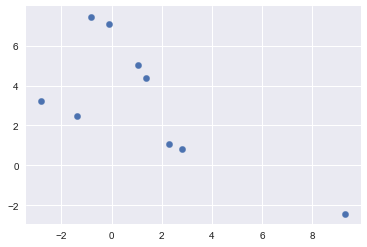

In [5]:
#The aim of this exercise is to write kmeans clustering from the ground up. Using the blob function to create a dataset 
#Defining dataset using blob function.#Checking the output of the blob function. 
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=9, centers=5,
                  random_state=0, cluster_std=0.50) 
plt.scatter(X[:, 0], X[:, 1], s=40);

In [6]:
# Initialize The centroids
def initial_centroids(points, k):
    #Returns k number of centroids picked randomly from the dataset
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [7]:
#Checking the output of this function with our dataset X as input
initial_centroids(X, 5)

array([[ 2.80230706,  0.79508453],
       [-0.81603768,  7.46437751],
       [-0.11337846,  7.10827718],
       [ 1.04829186,  5.03092408],
       [ 2.27719914,  1.06450082]])

In [8]:
#Function measure distance between datapoints and centroids.
import numpy as np
import scipy.spatial.distance as metric
def distance(a,b, ax=1): 
    return np.linalg.norm(a - b, axis = ax)
    

In [44]:
#dis = distance (initial_centroids(X, k),centroid_old)
#print (dis)

8.122994574609399


In [11]:
import pandas as pd
import numpy as np
from copy import deepcopy
#Have to calculate distance between all points in sample and centroid

distances =[]
clusters = np.zeros(len(X)) #Initializing clusters such that each point in dataset is seen as belonging to the same cluster 
#if there are there 10 points, they all belong to cluster 0 at starting point. Creating an array of 0 to correspond to each cluster as a starting point
k = 3 #Intial number of centroids is 3
centroid_old =np.zeros(initial_centroids(X, k).shape) #Initializing variable centroid old where centroid values wil be stored. Setting this variable to zero. 
dis = distance (initial_centroids(X, k),centroid_old,None) #Calculating the distance between previous 
#centroids and new ones until there is no change between the previous and new ones i.centroid locations stay the same 
# Loop will run till the dis becomes zero

while dis != 0: #As long as this condition is true such that the centroids keep changing in each iteration, this loop will go
    # Assigning each value to its closest cluster
    for i in X: # For each datapoint in X at index i
        c = distance(i,initial_centroids(X, k)) #Find the distance  between and i and the centroids
        cluster = np.argmin(c)  #Pick the min distance and assign point to that cluster 
        clusters[np.argwhere(X==i)[0]] = cluster #Update the clusters list which was initialized as 0 for each point to the 
        # to cluster number which has the shortest distance. np.argwhere (X==i)[0] fetches the index location of datapoint 
        # i in sample X. It gets the matching indices packed as a 2D array with each row holding indices for each match 
        #and then index into the first row by using [0]
    # Storing the old centroid values
    centroid_old= deepcopy(initial_centroids(X, k))
                                             
    # Finding the new centroids by taking the average value
    for i in range(k): #For each cluster point in k ie if there are 3 clusters : 0,1,2
        new_cent = [X[j] for j in range(len(X)) if clusters[j] == i]
        initial_centroids(X, k)[i] = np.mean(new_cent, axis=0)
        distances.append(cluster)
    dis= distance(initial_centroids(X, k),centroid_old,None) 
    


C:\Users\shabnaz\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\shabnaz\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
df2 = np.concatenate([X, clusters[:, None]], axis=1)

In [13]:
DF2 = pd.DataFrame(df2,columns=['X','Y', 'Cluster label'])

In [14]:
DF2

X         Y  Cluster label
0  2.802307  0.795085            0.0
1 -0.113378  7.108277            2.0
2  2.277199  1.064501            2.0
3 -2.803399  3.244692            2.0
4  9.296134 -2.424762            2.0
5  1.356789  4.364625            1.0
6 -1.370370  2.490834            2.0
7  1.048292  5.030924            1.0
8 -0.816038  7.464378            0.0